**IMPORTING LIBRARIES**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle
from tensorflow.keras.optimizers import RMSprop

**UPLOADING FILES OF Sherlock_Holmes.txt**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving legend.txt to legend.txt


In [ ]:
path = 'legend.txt'
text = open(path).read().lower()
print('length of the corpus is: :', len(text))

length of the corpus is: : 89235


In [ ]:
file = open("legend.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'Project Gutenberg’s The Legend of Sleepy Hollow, by Washington Irving This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: The Legend of Sleepy Hollow Author: Washington Irving Posting Date: June 25, 2008 [EBook #41] Release Date: October, 1992 Last Updated: September 14, 2016 Language: English Ch'

In [ ]:
len(data)

88699

**TOKENIZATION**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[21, 845, 1, 283, 2, 77, 57, 14, 427, 428, 17, 185, 27, 18, 1]

In [ ]:
len(sequence_data)

15546

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

3705


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  15543


array([[ 21, 845,   1, 283],
       [845,   1, 283,   2],
       [  1, 283,   2,  77],
       [283,   2,  77,  57],
       [  2,  77,  57,  14],
       [ 77,  57,  14, 427],
       [ 57,  14, 427, 428],
       [ 14, 427, 428,  17],
       [427, 428,  17, 185],
       [428,  17, 185,  27]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 21 845   1]
 [845   1 283]
 [  1 283   2]
 [283   2  77]
 [  2  77  57]
 [ 77  57  14]
 [ 57  14 427]
 [ 14 427 428]
 [427 428  17]
 [428  17 185]]
Response:  [283   2  77  57  14 427 428  17 185  27]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**CREATING MODEL**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             37050     
                                                                 
 lstm (LSTM)                 (None, 3, 50)             12200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 3705)              188955    
                                                                 
Total params: 260,955
Trainable params: 260,955
Non-trainable params: 0
_________________________________________________________________


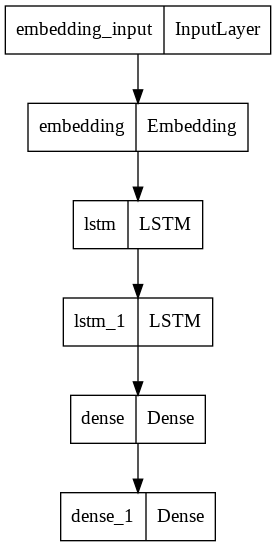

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

**TRAINNING OF MODEL**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
optimizer = RMSprop(learning_rate=0.01)
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.05, batch_size=128, epochs=100, shuffle=True).history

Epoch 1/100
116/116 [==============================] - 9s 37ms/step - loss: 6.7794 - accuracy: 0.0715 - val_loss: 7.7922 - val_accuracy: 0.0707
Epoch 2/100
116/116 [==============================] - 3s 24ms/step - loss: 6.2991 - accuracy: 0.0970 - val_loss: 7.4118 - val_accuracy: 0.0591
Epoch 3/100
116/116 [==============================] - 3s 26ms/step - loss: 5.9857 - accuracy: 0.1076 - val_loss: 8.1375 - val_accuracy: 0.0784
Epoch 4/100
116/116 [==============================] - 3s 26ms/step - loss: 5.7466 - accuracy: 0.1235 - val_loss: 7.8849 - val_accuracy: 0.1260
Epoch 5/100
116/116 [==============================] - 3s 25ms/step - loss: 5.5729 - accuracy: 0.1340 - val_loss: 7.5592 - val_accuracy: 0.1350
Epoch 6/100
116/116 [==============================] - 3s 24ms/step - loss: 5.4412 - accuracy: 0.1416 - val_loss: 8.2738 - val_accuracy: 0.1324
Epoch 7/100
116/116 [==============================] - 3s 23ms/step - loss: 5.3232 - accuracy: 0.1493 - val_loss: 8.1535 - val_accuracy:

**NEXT WORD PREDICTING**

**OUTPUT**

In [ ]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
sequence = tokenizer.texts_to_sequences([input_text])[0]
preds = pad_sequences([sequence], maxlen=3, truncating='pre')
print(sequence, preds)
for i in (model.predict(preds)[0]).argsort()[-3:][::-1]:
  predicted_word = tokenizer.index_word[i]
  print("Next word suggestion:",predicted_word)

whole neighbourhood abounds with local 
[107, 1524, 10, 626] [[1524   10  626]]
Next word suggestion: tales
Next word suggestion: until
Next word suggestion: smoked


**IMPORTING LIBRARIES**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle
from tensorflow.keras.optimizers import RMSprop

**SAVING MODEL CHECK POINTS**

In [ ]:
model.save('next_words.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_words.h5')
history = pickle.load(open("history.p", "rb"))

**ACCURACY CURVE**

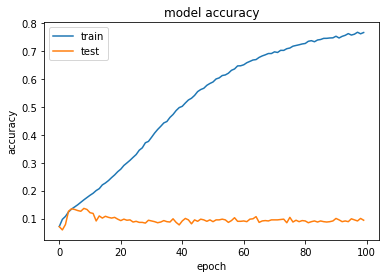

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

**LOSS CURVE**

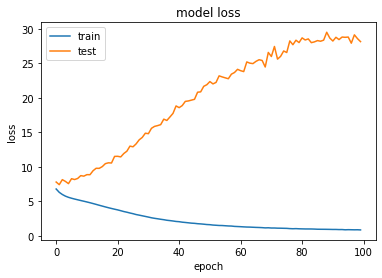

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')